# ECE 590, Fall 2019 
## Problem Set 4 

## Full name: 


In [22]:
### Problem 2

In [23]:
import numpy as np
xo = [2, 2, 2, 2, 2]

def L(x):
    return sum([xi**2 for xi in x]) + sum([x[i]*x[j] for i in range(0,5) for j in range(i+1,len(x))])
    
def gradL(x):
    return np.array([sum(x)+xi for xi in x])

def grad(x):
    t = 1
    x = np.array(x)
    while L(x) > .01:
        x = x - (1/t)*gradL(x)
        t += 1
    return (t,x)

print("Number of iterations ",grad(xo)[0])

Number of iterations  7


### Problem 3 (Binary Classification with Pytorch)

In [24]:
# import packages 
import pandas as pd 
from sklearn.model_selection import train_test_split
import torch
import torch.nn.functional as F
import torch.nn as nn

In [25]:
""" data preparation """

# read csv file 
df = pd.read_csv("breast_cancer.csv") # df denotes a data frame 

# extract the 'diagnosis' column as your targets 
targets = df['diagnosis'].values

# convert the entries of targets to 0/1 
    
targets = (targets == "M") * 1
     
# extract your features data
data = df.drop(['diagnosis', 'id'], axis=1).values

# train/test split 
X_train, X_test, y_train, y_test = train_test_split(data, targets, test_size=0.3, random_state=40)

In [26]:
#w_train, w_test = 
X_train, y_train = torch.from_numpy(X_train).float(), torch.from_numpy(y_train).float()
X_test, y_test = torch.from_numpy(X_test).float(), torch.from_numpy(y_test).float() 

In [27]:
import torch
import torch.nn.functional as F
import torch.nn as nn
import matplotlib.pyplot as plt

In [28]:
n_features = 12
class binary_classification(nn.Module):
    def __init__(self, n_features, out_features, bias):
        super(binary_classification, self).__init__()
        self.linear = nn.Linear(in_features=n_features, out_features=1, bias= False)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        a1 = self.linear(x)
        y = self.sigmoid(a1)
        return y

model = binary_classification(n_features, 1, False)
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)
losses = []
num_iter = 1000

for i in range(num_iter):
    def closure():
        optimizer.zero_grad()
        y_hat_train = model(X_train)     # Forward Pass
        #loss =  - y_train *torch.log(y_hat_train) - (1-y_train)*torch.log(1-y_hat_train)
        loss = criterion(y_hat_train.squeeze(), y_train)
        loss.backward()      # backward Pass
        losses.append(loss.item())
        return loss
    optimizer.step(closure)

with torch.no_grad():
    model.eval()
    y_hat_test = model(X_test)
    #mse =  - y_test *torch.log(y_hat_test) - (1-y_test)*torch.log(1-y_hat_test)
    mse = criterion(y_hat_test.squeeze(), y_test)
Weight = model.linear.weight

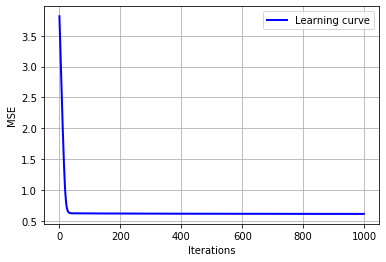

In [29]:
plt.figure()
plt.plot(list(range(len(losses))), losses, color='blue', linewidth=2, label='Learning curve')
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.grid()
plt.show()

In [30]:
n_features = 12
class binary_classification_layers(nn.Module):
    def __init__(self, n_features, out_features, bias):
        super(binary_classification_layers, self).__init__()
        self.linear1 = nn.Linear(n_features, 32)
        self.linear2 = nn.Linear(32, 16)
        self.linear3 = nn.Linear(16, out_features)
        self.sigmoid = nn.Sigmoid()
        self.relu = nn.ReLU()

    def forward(self, x):
        a1 = self.linear1(x)
        h1 = self.relu(a1)
        a2 = self.linear2(h1)
        h2 = self.relu(a2)
        a3 = self.linear3(h2)
        y = self.sigmoid(a3)
        return y

model = binary_classification_layers(n_features, 1, True)
#loss = - t*np.log(y) - (1-t)*np.log(1-y)
#criterion = nn.CrossEntropyLoss()
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)
losses = []
num_iter = 500

for i in range(num_iter):
    def closure():
        optimizer.zero_grad()
        y_hat_train = model(X_train)     # Forward Pass
        #loss =  - y_train *torch.log(y_hat_train) - (1-y_train)*torch.log(1-y_hat_train)
        loss = criterion(y_hat_train.squeeze(), y_train)
        loss.backward()      # backward Pass
        losses.append(loss.item())
        return loss
    optimizer.step(closure)

with torch.no_grad():
    model.eval()
    y_hat_test = model(X_test)
    #mse =  - y_test *torch.log(y_hat_test) - (1-y_test)*torch.log(1-y_hat_test)
    mse = criterion(y_hat_test.squeeze(), y_test)
#Weight = model.linear.weight

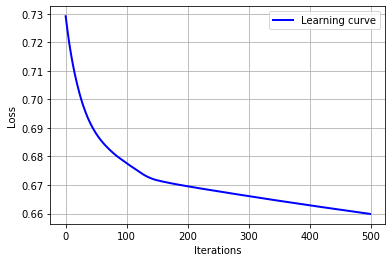

In [31]:
plt.figure()
plt.plot(list(range(len(losses))), losses, color='blue', linewidth=2, label='Learning curve')
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.grid()
plt.show()

### Problem 5 (Implementing a Two-Layer Neural Network)

Recall that when training your model you are required to compute the gradient of the loss with respect
to the model parameters. Repeat the tasks required in part 2 (See Figure 2) of Problem 3 without
using the Optim package from Pytorch and by implementing full Gradient Descent from scratch
(Autograd is not allowed). In other words, you have to implemnt the backward propagation and the
full gradient descent algorithms by yourself.

In [32]:
# Put your code here 
# import packages 
import pandas as pd 
from sklearn.model_selection import train_test_split

import torch
import torch.nn.functional as F
import torch.nn as nn

In [33]:
n_features = 12
class binary_classification_layers(nn.Module):
    def __init__(self, n_features, out_features, bias, alpha):
        super(binary_classification_layers, self).__init__()
        self.linear1 = nn.Linear(n_features, 32)
        self.linear2 = nn.Linear(32, 16)
        self.linear3 = nn.Linear(16, out_features)
        self.sigmoid = nn.Sigmoid()
        self.relu = nn.ReLU()
        self.alpha = alpha

    def forward(self, x):
        Z1 = self.linear1(x)
        H1 = self.relu(Z1)
        Z2 = self.linear2(H1)
        H2 = self.relu(Z2)
        Z3 = self.linear3(H2)
        Y = self.sigmoid(Z3)
        return {'Y_hat':Y,'Z1':Z1, 'Z2':Z2, 'Z3':Z3, 'H1':H1, 'H2':H2}
    
    def backward(self,X,Y):
        output = self.forward(X)
        Y_hat = output['Y_hat']
        Z1 = output['Z1']
        Z2 = output['Z2']
        Z3 = output['Z3']
        H1 = output['H1']
        H2 = output['H2']
        with torch.no_grad():  
            W1 = self.linear1.weight
            W2 = self.linear2.weight
            W3 = self.linear3.weight
            
            Y = Y.reshape(-1,1)
            dYdW3 = torch.mm(torch.t(H2),(Y_hat - Y))
            M = torch.mm((Y_hat-Y),W3)
            M0 = torch.zeros(Z2.shape)
            M_Z2 = torch.where(Z2>=0,M,M0)
            dYdW2 = torch.mm(torch.t(H1), M_Z2)
            N = torch.mm(M_Z2,W2)
            N0 = torch.zeros(Z1.shape)
            N_Z2 = torch.where(Z1>=0,N,N0)
            dYdW1 = torch.mm(torch.t(X),N_Z2)

            self.linear1.weight -=  self.alpha * torch.t(dYdW1)
            self.linear2.weight -=  self.alpha * torch.t(dYdW2)
            self.linear3.weight -= self.alpha * torch.t(dYdW3)
        return Y_hat

model = binary_classification_layers(n_features, 1, True, .00001)
criterion = nn.BCELoss()
losses = []
num_iter = 500

for i in range(num_iter):
    y_hat_train = model.backward(X_train, y_train)
    loss = criterion(y_hat_train.squeeze(), y_train)
    losses.append(loss.item())

with torch.no_grad():
    model.eval()
    y_hat_test = model.backward(X_test, y_test)
    mse = criterion(y_hat_test.squeeze(), y_test)



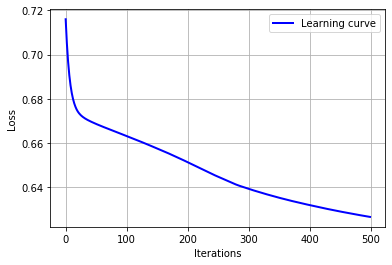

In [34]:
plt.figure()
plt.plot(list(range(len(losses))), losses, color='blue', linewidth=2, label='Learning curve')
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.grid()
plt.show()